# Time Expressions in the Hebrew Bible

In this notebook I aim to provide a simple overview of time expressions in the Hebrew Bible as they are stored in the ETCBC Hebrew syntactic database. The ETCBC has a feature of `function` stored on phrases in the corpus. The primary function of interest here is `Time`. Thus, we begin with a basic exploratory overview of the ETCBC `Time` phrases, looking specifically at their identity and distribution.

We currently limit the corpus to so-called Standard Biblical Hebrew texts, Genesis—Kings.

In [62]:
# load data and modules
import collections
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hebrew_data = ['~/github/etcbc/{}/tf/c'.format(direc) for direc in ('bhsa','lingo/heads')]
TF = Fabric(locations=hebrew_data, silent=True)
features = '''

heads typ

'''
api = TF.load(features, silent=True)
B = Bhsa(api=api, hoist=globals()) 

Cannot determine the name of this notebook
Work around: call me with a self-chosen name: name='xxx'


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="provenance of this corpus">BHSA</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Writing/Hebrew/" title="Hebrew characters and transcriptions">Character table</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="BHSA feature documentation">Feature docs</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/Bhsa/" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/" title="text-fabric-api">Text-Fabric API 6.3.0</a> <a target="_blank" href="https://dans-labs.github.io/text-fabric/Api/General/#search-templates" title="Search Templates Introduction and Reference">Search Reference</a>


This notebook online:
<a target="_blank" href="https://nbviewer.jupyter.org/github/csl/time_collocations/blob/master/analysis/time_expressions.ipynb">NBViewer</a>
<a target="_blank" href="https://github.com/csl/time_collocations/blob/master/analysis/time_expressions.ipynb">GitHub</a>


In [38]:
corpus = [book for book in F.otype.s('book') if book < T.nodeFromSection(('Isaiah',))]
print('Corpus:')
print('\n'.join(F.book.v(book) for book in corpus))

Corpus:
Genesis
Exodus
Leviticus
Numeri
Deuteronomium
Josua
Judices
Samuel_I
Samuel_II
Reges_I
Reges_II


## Introductory Data Exploration

The `Time` feature is stored on phrases. What phrase types occur with these phrases, and in what quantity?

Number of time phrases in the corpus:
  0.29s 2180 results

Phrase types and their frequency:
      count
PP     1180
NP      632
AdvP    368


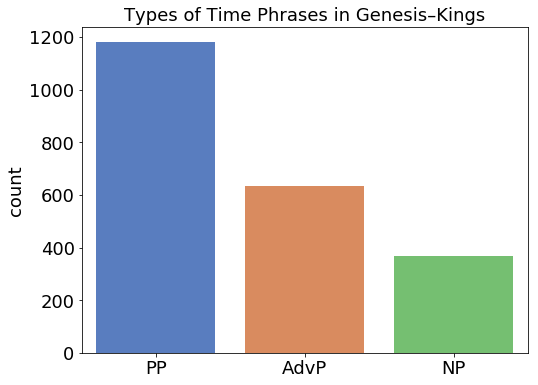

In [123]:
find_time = '''
corpus
    phrase function=Time 
'''
print('Number of time phrases in the corpus:')
times = B.search(find_time, sets={'corpus': corpus}) # run search

# make counts of phrase types
count_types = collections.Counter(F.typ.v(res[1]) for res in times)
count_types = pd.DataFrame.from_dict(count_types, orient='index', columns=['count'])

# show counts and plot
print('\nPhrase types and their frequency:')
print(count_types.sort_values(ascending=False, by='count'))
plt.figure(figsize=(8, 6))
sns.barplot(x=[0, 1, 2], y=count_types['count'].sort_values(ascending=False), palette='muted')
plt.xticks([0, 1, 2], count_types.index, size=18)
plt.yticks(size=18)
plt.title('Types of Time Phrases in Genesis–Kings', size=18)
plt.ylabel('count', size=18)
plt.show()

The prepositional phrase is by far the most common in the corpus. We should thus have a look at the kinds of prepositions involved and their distributions.

In [134]:
prep_times = [res[1] for res in times if F.typ.v(res[1]) == 'PP'] # select PPs from the data

prep_counts = collections.Counter(T.text(E.heads.f(pp)[0], fmt='lex-orig-plain') for pp in prep_times)

In [135]:
prep_counts

Counter({'ב ': 644,
         'ל ': 99,
         'מן ': 105,
         'אחר ': 74,
         'עד ': 205,
         'כ ': 38,
         'בלת ': 1,
         'בין ': 10,
         'את ': 2,
         'על ': 1,
         'אל ': 1})